In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [6]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

/var/folders/n_/5dywcdcx0152r0dxd2cghylh0000gn/T/ipykernel_14114/3505941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


In [7]:
df['GarageType'].fillna('None', inplace=True)

/var/folders/n_/5dywcdcx0152r0dxd2cghylh0000gn/T/ipykernel_14114/768887189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageType'].fillna('None', inplace=True)


In [8]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [9]:
# Select numeric columns
numeric_feats = df.select_dtypes(include=[np.number]).columns

# Check skewness
from scipy.stats import skew
skewness = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Fix skewed features
skewed_features = skewness[abs(skewness) > 0.75].index
for feat in skewed_features:
    df[feat] = np.log1p(df[feat])

In [10]:
df = pd.get_dummies(df)

In [11]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [12]:
print(df.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)


In [13]:
import numpy as np

# Fill missing numeric values with 0 (or you can choose mean/median)
X = np.nan_to_num(X)  

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X = imputer.fit_transform(X)

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(np.isnan(X).sum())

0


In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: -5.183096178023444e+24
RMSE: 983474809912.7827


In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Best Random Forest R2:", r2_score(y_test, y_pred_rf))

Best Random Forest R2: 0.8871121014181866


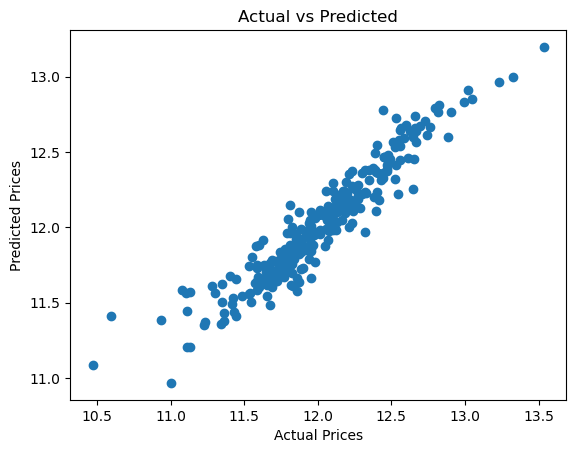

In [20]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

In [21]:
errors = abs(y_pred_rf - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.1


Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'